In [5]:
import os, shutil
original_dataset_dir = 'Datasets/kaggle_original_data'
base_dir='Datasets/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
#os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

In [6]:
train_cats_dir=os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)

In [9]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [10]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [11]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [12]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [14]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [15]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [7]:
from keras import layers
from keras import models

In [20]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers

In [28]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator 

In [30]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
#Binary depends on loss in compile
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                            validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 153s 2s/step - loss: 0.6897 - acc: 0.5405 - val_loss: 0.6721 - val_acc: 0.6470
Epoch 2/30
100/100 [==============================] - 148s 1s/step - loss: 0.6576 - acc: 0.6130 - val_loss: 0.6360 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 147s 1s/step - loss: 0.6065 - acc: 0.6685 - val_loss: 0.6910 - val_acc: 0.5530
Epoch 4/30
100/100 [==============================] - 142s 1s/step - loss: 0.5612 - acc: 0.7070 - val_loss: 0.5890 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 141s 1s/step - loss: 0.5372 - acc: 0.7160 - val_loss: 0.5768 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 142s 1s/step - loss: 0.5089 - acc: 0.7510 - val_loss: 0.5734 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 142s 1s/step - loss: 0.4788 - acc: 0.7635 - val_loss: 0.5798 - val_acc: 0.7070
Epoch 8/30
100/100 [=

In [37]:
model.save('cats_and_dogs_small_!.h5')

In [4]:
from keras.models import load_model

/home/linuxbox/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model=load_model('cats_and_dogs_small_1.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
import matplotlib.pyplot as plt

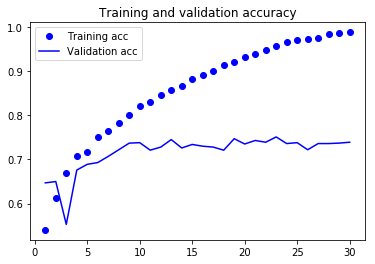

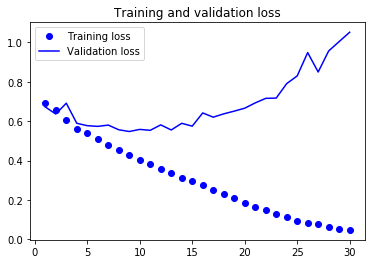

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                           zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [12]:
from keras.preprocessing import image
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))

In [13]:
x=image.img_to_array(img)#Numpy-Array
x=x.reshape((1,)+x.shape)#1,150,150,3

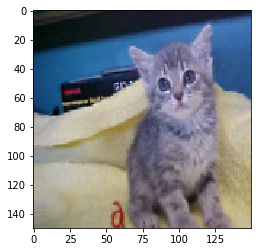

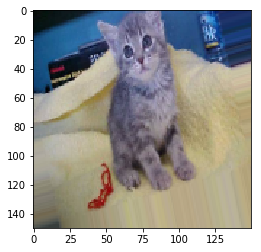

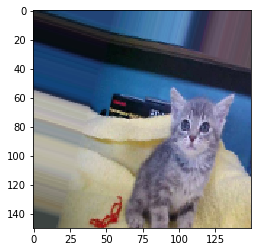

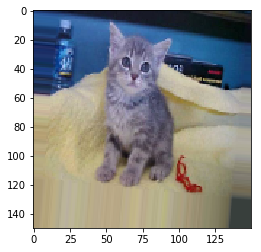

In [15]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imagplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                 shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                      batch_size=32,class_mode='binary')

history=model.fit_generator(train_generator,steps_per_epoch=50,epochs=50,#steps_per_epoch=100,epochs=100,
                            validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
49/50 [============================>.] - ETA: 2s - loss: 0.6959 - acc: 0.5198

/home/linuxbox/.local/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


50/50 [==============================] - 160s 3s/step - loss: 0.6957 - acc: 0.5194 - val_loss: 8.0319 - val_acc: 0.4962
Epoch 2/50
50/50 [==============================] - 139s 3s/step - loss: 0.6921 - acc: 0.5175 - val_loss: 5.7803 - val_acc: 0.5628
Epoch 3/50
50/50 [==============================] - 140s 3s/step - loss: 0.6849 - acc: 0.5550 - val_loss: 7.1615 - val_acc: 0.5273
Epoch 4/50
50/50 [==============================] - 137s 3s/step - loss: 0.6805 - acc: 0.5562 - val_loss: 5.7384 - val_acc: 0.5863
Epoch 5/50
50/50 [==============================] - 137s 3s/step - loss: 0.6692 - acc: 0.5781 - val_loss: 7.6518 - val_acc: 0.5133
Epoch 6/50
50/50 [==============================] - 147s 3s/step - loss: 0.6649 - acc: 0.5875 - val_loss: 6.0764 - val_acc: 0.5945
Epoch 7/50
50/50 [==============================] - 149s 3s/step - loss: 0.6557 - acc: 0.6081 - val_loss: 6.7368 - val_acc: 0.5609
Epoch 8/50
50/50 [==============================] - 148s 3s/step - loss: 0.6425 - acc: 0.6206 

In [1]:
model.save('cats_and_dogs_small_2.h5')

NameError: name 'model' is not defined